In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# ! pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## hw_10_2

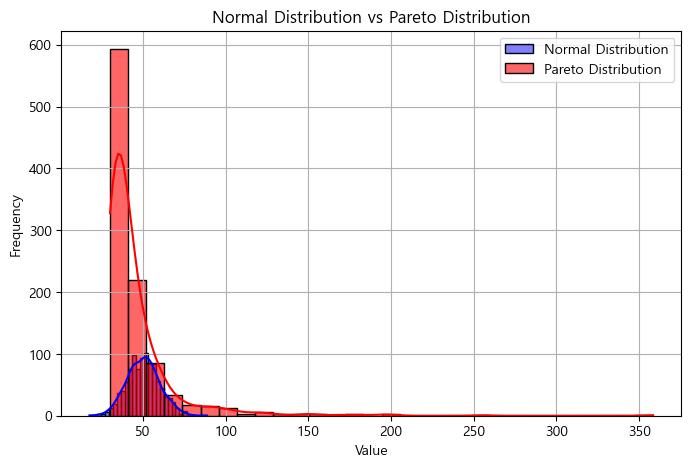

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_hw4_2.csv')

# "normal_data" 열만 추출해 Series로 만듦
normal_data = df['normal_data']
# "pareto_data" 열만 추출해 Series로 만듦
pareto_data = df['pareto_data']


# 데이터 시각화
plt.figure(figsize=(8, 5))
sns.histplot(normal_data, bins=30, kde=True, color='blue', label='Normal Distribution')
sns.histplot(pareto_data, bins=30, kde=True, color='red', label='Pareto Distribution', alpha=0.6)
plt.title('Normal Distribution vs Pareto Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from scipy.stats import chisquare

# 히스토그램 빈도 계산
observed_freq, bins = np.histogram(normal_data, bins=30)  # [빈칸] 정규분포 데이터에 대한 히스토그램 계산
# _ 는 bin의 경계값은 필요 없으니 그냥 무시한다는 뜻
expected_freq, _ = np.histogram(pareto_data, bins=bins)  # [빈칸] Pareto 분포 데이터에 대한 히스토그램 계산

# 기대 빈도를 실제 빈도와 스케일 맞춤
expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
expected_freq = np.round(expected_freq)

# 유효한 값만 선택
valid_indices = expected_freq > 0
observed_freq = observed_freq[valid_indices]
expected_freq = expected_freq[valid_indices]

# 빈도 차이 조정
difference = observed_freq.sum() - expected_freq.sum()
if difference > 0:
    expected_freq[np.argmax(expected_freq)] += difference  # 가장 큰 값에 차이 추가
elif difference < 0:
    expected_freq[np.argmax(expected_freq)] -= abs(difference)  # 가장 큰 값에서 차이 제거

# 카이제곱 검정 수행
# 관측값(f_obs)과 기대값(f_exp)
chi_stat, p_value = chisquare(observed_freq, expected_freq)  # [빈칸] 카이제곱 검정 수행

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Chi-Square Statistic: 1387.4951
P-value: 0.0000


## hw_10_4

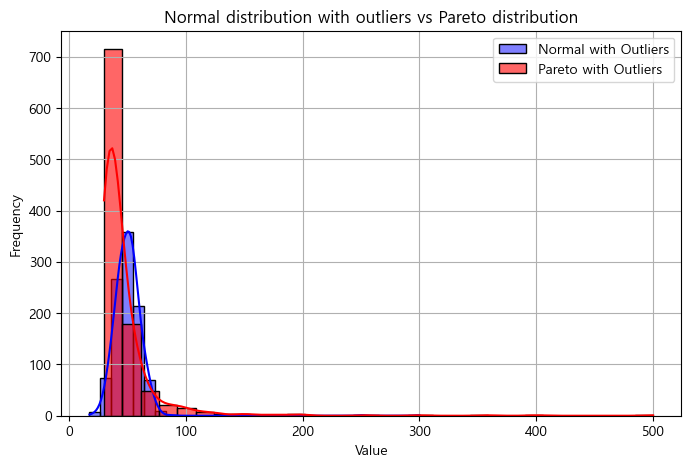

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_hw4_4.csv')

normal_outliers = df['normal_outliers']
pareto_outliers = df['pareto_outliers']


# 시각화
plt.figure(figsize=(8, 5))
sns.histplot(normal_outliers, bins=30, kde=True, color='blue', label='Normal with Outliers')
sns.histplot(pareto_outliers, bins=30, kde=True, color='red', label='Pareto with Outliers', alpha=0.6)
plt.title('Normal distribution with outliers vs Pareto distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import chisquare

# 히스토그램 빈도 계산
observed_freq, bins = np.histogram(normal_outliers, bins=30)  # [빈칸] 정규분포 이상치 포함 데이터의 히스토그램 계산
expected_freq, _ = np.histogram(pareto_outliers, bins=bins)  # [빈칸] Pareto 분포 이상치 포함 데이터의 히스토그램 계산

expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
expected_freq = np.round(expected_freq)

valid_indices = expected_freq > 0
observed_freq = observed_freq[valid_indices]
expected_freq = expected_freq[valid_indices]

# 빈도 차이 조정
difference = observed_freq.sum() - expected_freq.sum()
if difference > 0:
    expected_freq[np.argmax(expected_freq)] += difference  # 가장 큰 값에 차이 추가
elif difference < 0:
    expected_freq[np.argmax(expected_freq)] -= abs(difference)  # 가장 큰 값에서 차이 제거

# 카이제곱 검정 수행
chi_stat, p_value = chisquare(observed_freq, expected_freq)  # [빈칸] 카이제곱 검정 수행

# 결과 출력
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Chi-Square Statistic: 1197.8108
P-value: 0.0000
